<a href="https://colab.research.google.com/github/inesmnif/inesmnif.github.io/blob/main/projet_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Importing the important libraries

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 2- Importing  Dataset

In [23]:
#Importing the dataset
df=pd.read_csv('creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# #Exploring the dataset


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [26]:

df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

tout est bien pas de valeurs nan .

#Showing the coerrelation map **figure**

<Axes: >

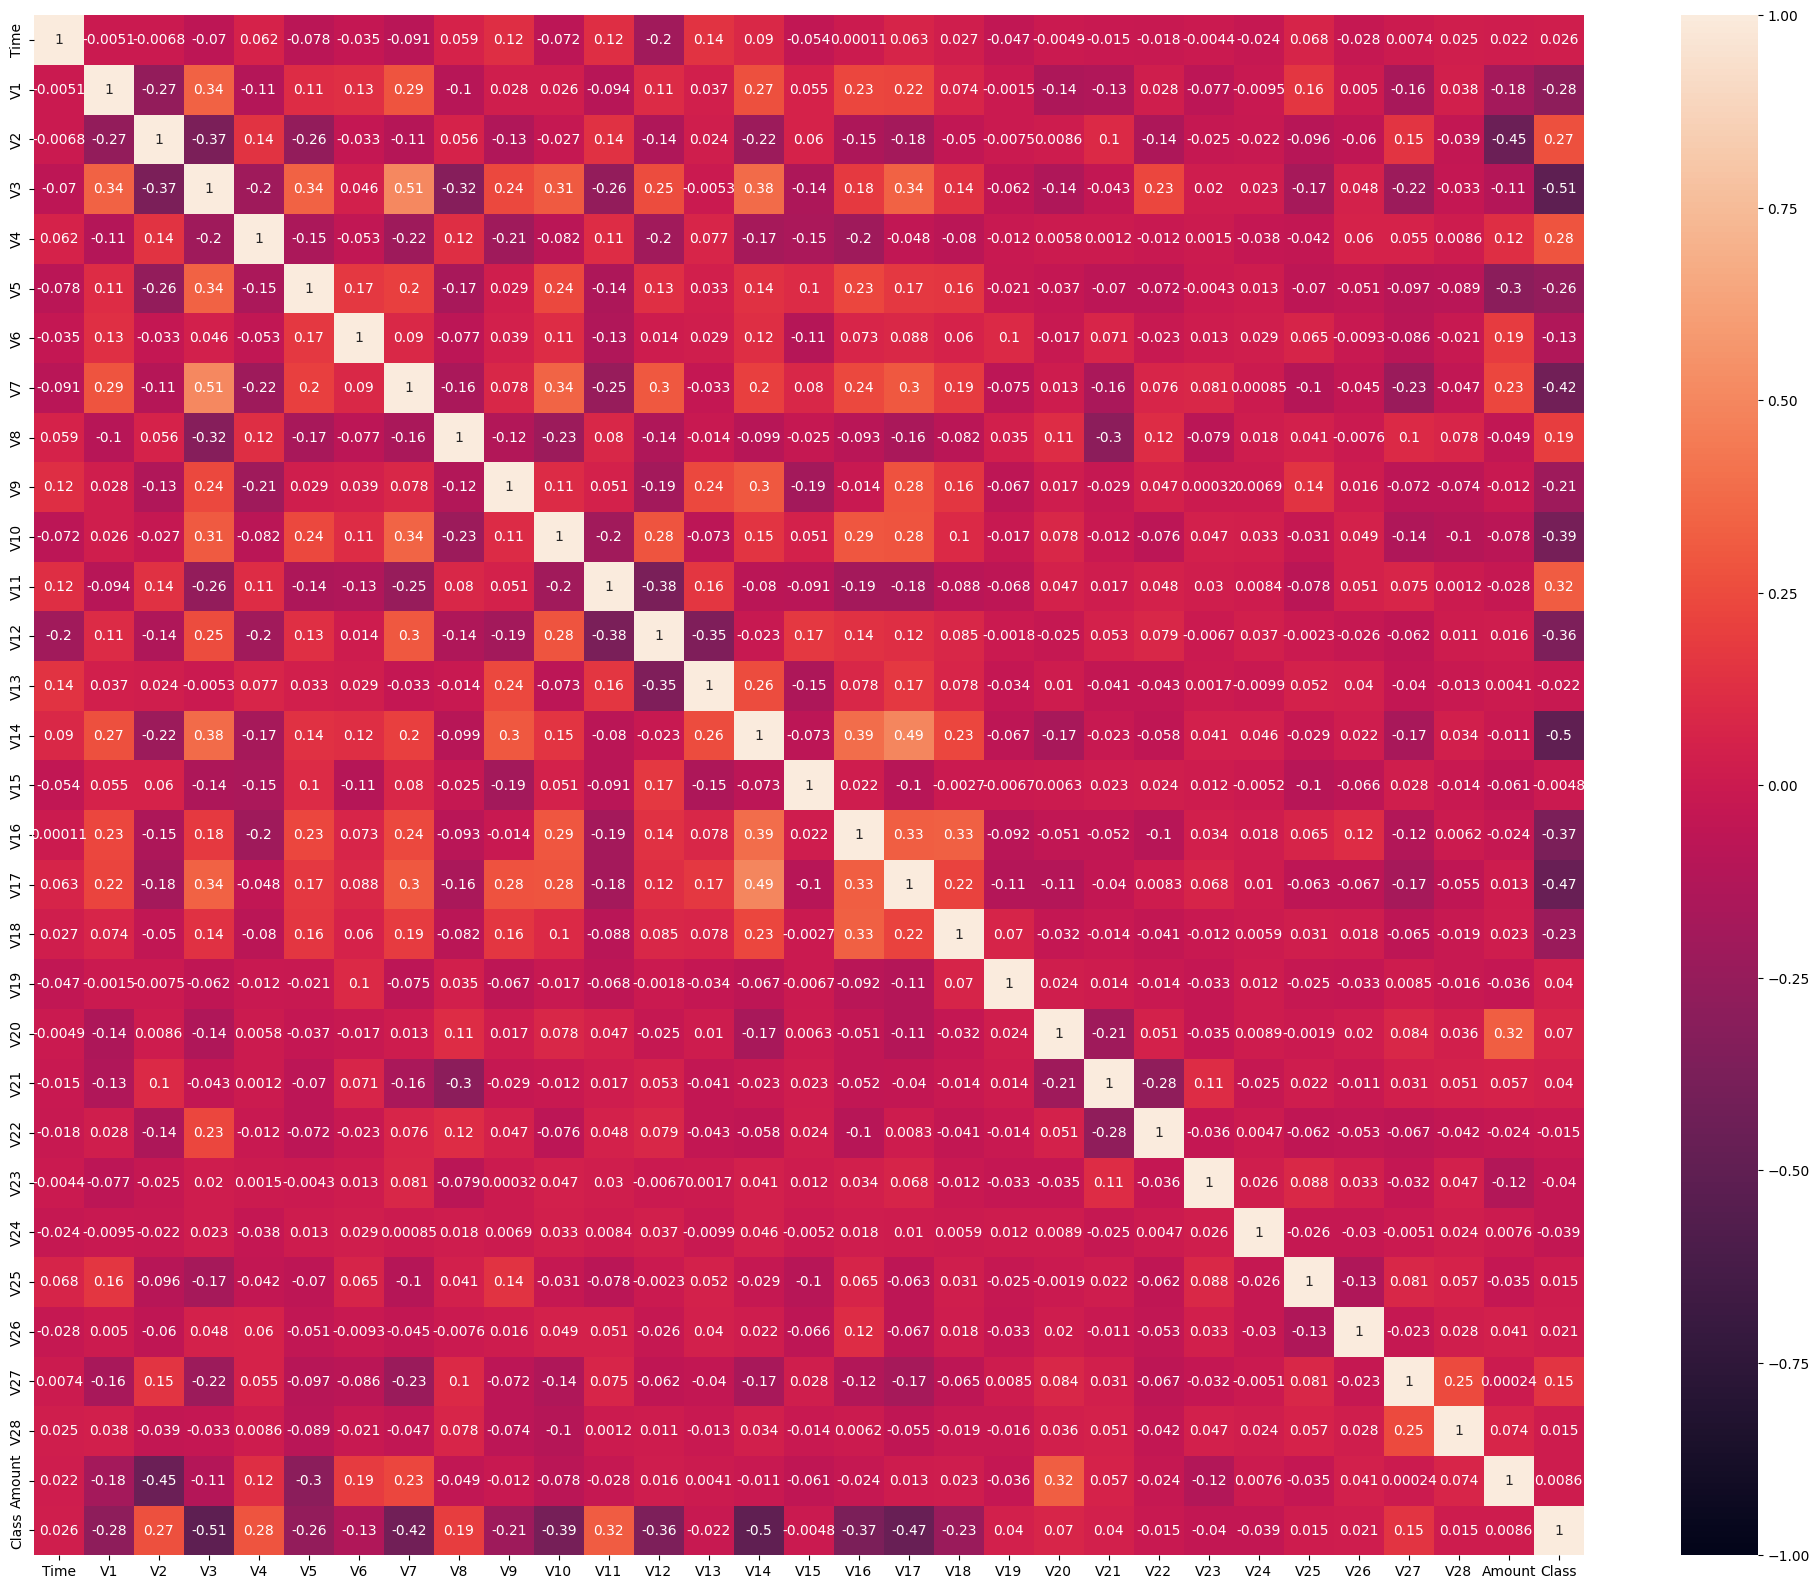

In [27]:
df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

# **Data Vizualisation :**

0.0    15862
1.0       73
Name: Class, dtype: int64

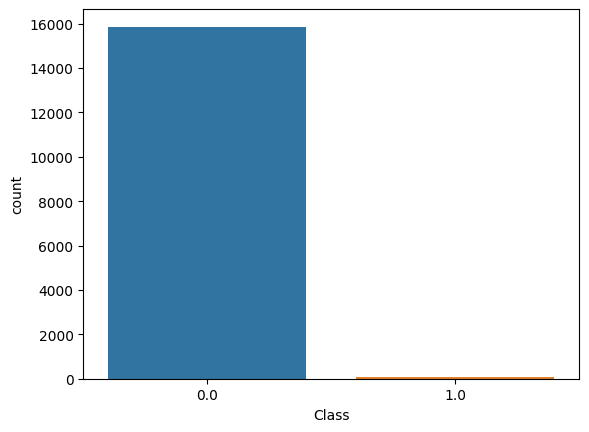

In [28]:
sns.countplot(x='Class',data=df)
df["Class"].value_counts()

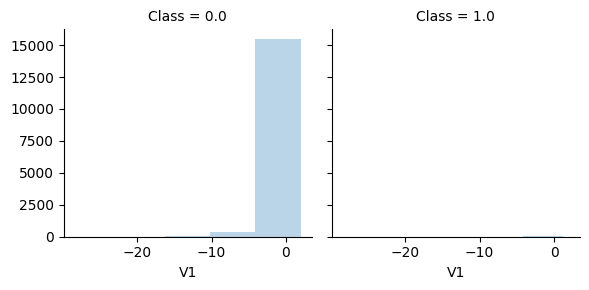

In [29]:
g=sns.FacetGrid(df,col='Class')
g.map(plt.hist,'V1',bins=5,alpha=0.3)

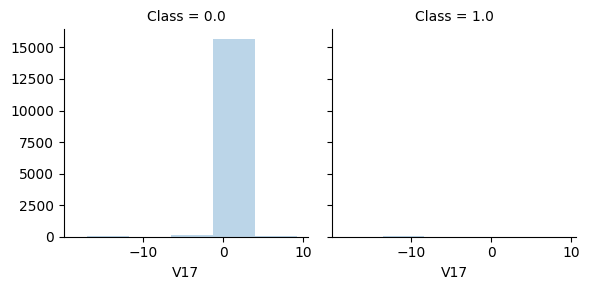

In [30]:
g=sns.FacetGrid(df,col='Class')
g.map(plt.hist,'V17',bins=5,alpha=0.3)

there is  no positive correlation  all the columns are features they are our input and  'Class' is the output

***Modeling the data***

In [31]:
#selecting features
x=df.drop(['Class'],axis=1)
y=df['Class']

In [32]:
#Checking x
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [33]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15936 entries, 0 to 15935
Series name: Class
Non-Null Count  Dtype  
--------------  -----  
15935 non-null  float64
dtypes: float64(1)
memory usage: 124.6 KB


## splitting the data to train and test

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [43]:
#applying the logistic regression model
logreg = LogisticRegression(solver='newton-cg')
#training the model
logreg.fit(x_train, y_train)
#testing the model prediction
y_pred  = logreg.predict(x_test)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



ValueError: ignored

#Exploring metrics

In [44]:
#showing accuracy metric
accuracy= accuracy_score(y_test,y_pred)*100
print("Accuracy is",accuracy)

NameError: ignored

==> The accuracy is high and good but we are afraid of surapprentissage so  verify and validate it with other metrics such as confusion matrix

In [ ]:
#applying confusion matrix in addition to accuracy metric
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#showing classification report

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# #showing the probability of belonging the result of x_test to the class=1


In [ ]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

# #showing the ROC graph


In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#showing the AUC area


In [37]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=2)
plt.show()

NameError: ignored

In [ ]:
#Identifying the best threshold between true positive rate and false positive rate
from numpy import argmax
best_threshold= tpr-fpr
ax=argmax(best_threshold)
best=thresholds[ax]
print(best)

the model had a maximum number of true positive rates and a minimum number of false positive rates so the best threshold is 0.025 according to this model